<a href="https://colab.research.google.com/github/toaruman/hatamei/blob/main/project2_Kazuki_Ikenoue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving pwt1001.dta to pwt1001 (1).dta
   year countrycode       rgdpna      rkna        pop        emp          avh  \
0  1990         GBR  1698124.875  0.501647  57.134391  26.703501  1745.944085   
1  1991         GBR  1679392.875  0.517889  57.290785  25.989843  1720.546584   
2  1992         GBR  1686127.750  0.532458  57.446037  25.371502  1714.330462   

      labsh    rtfpna     alpha           y_n         hours  tfp_term  \
0  0.575844  0.920074  0.424156  63591.843750  46622.819185  0.865316   
1  0.582013  0.914806  0.417987  64617.277344  44716.736223  0.858138   
2  0.579820  0.917600  0.420180  66457.546875  43495.138613  0.862163   

   cap_term    lab_term  y_n_shifted  tfp_term_shifted  cap_term_shifted  \
0  0.000016  816.020235   100.000000        100.000000        100.000000   
1  0.000021  780.522317   101.612518         99.170372        136.018616   
2  0.000019  757.147767   104.506401         99.635597        125.529938   

   lab_term_shifted  
0        100.0000

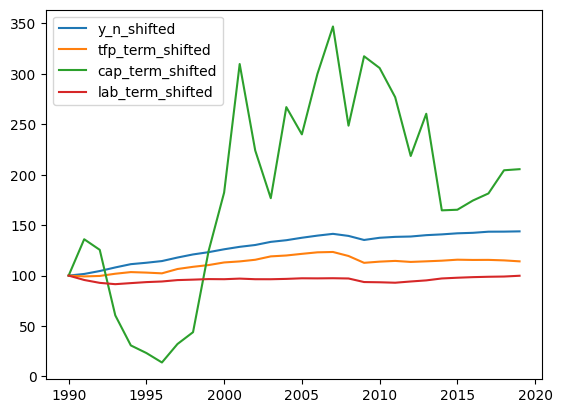

In [2]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

uploaded = files.upload()


file_name = 'pwt1001.dta'

pwt1001 = pd.read_stata(file_name)

# Filter and select relevant columns
data = pwt1001.loc[pwt1001['country'].isin(['United Kingdom'])][['year', 'countrycode', 'rgdpna', 'rkna', 'pop', 'emp', 'avh', 'labsh', 'rtfpna']]
data = data.loc[(data['year'] >= 1990) & (data['year'] <= 2019)].dropna()

# Calculate additional variables
data['alpha'] = 1 - data['labsh']
data['y_n'] = data['rgdpna'] / data['emp']  # Y/N
data['hours'] = data['emp'] * data['avh']  # L
data['tfp_term'] = data['rtfpna'] ** (1 / (1 - data['alpha']))  # A^(1/(1-alpha))
data['cap_term'] = (data['rkna'] / data['rgdpna']) ** (data['alpha'] / (1 - data['alpha']))  # (K/Y)^(alpha/(1-alpha))
data['lab_term'] = data['hours'] / data['pop']  # L/N
data = data.sort_values('year').groupby('countrycode').apply(lambda x: x.assign(
    alpha=1 - x['labsh'],
    y_n_shifted=100 * x['y_n'] / x['y_n'].iloc[0],
    tfp_term_shifted=100 * x['tfp_term'] / x['tfp_term'].iloc[0],
    cap_term_shifted=100 * x['cap_term'] / x['cap_term'].iloc[0],
    lab_term_shifted=100 * x['lab_term'] / x['lab_term'].iloc[0]
)).reset_index(drop=True).dropna()

# Print first 10 rows of data
print(data.head(3))

# Plot data
plt.plot(data['year'], data['y_n_shifted'], label='y_n_shifted')
plt.plot(data['year'], data['tfp_term_shifted'], label='tfp_term_shifted')
plt.plot(data['year'], data['cap_term_shifted'], label='cap_term_shifted')
plt.plot(data['year'], data['lab_term_shifted'], label='lab_term_shifted')
plt.legend()
plt.show()
